# 경영통계분석 1_ W1. 과제  (제출일: 2021.1.11.(월) 오후6시까지) 


※ 모든 문제에서 답만 쓰지말고, 계산과정도 함께 작성해 주세요. ※ 제출하는 파일 포맷은 MSWord, hwp, 또는 수기로 작성하고 스캔한 파일 어느 것이든 상관없습니다.

* 이름 : 황예진, 학번 : 20214166
* 과제 목표
1. 수업 내용 복습 : 개념 이해 및 계산식 이해
2. 코드 연습 : 문제 풀이 코딩을 디테일하게 하면서 코드 연습 

In [1]:
# 패키지 임포트 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## 도수분포표, 누적도수분포표, 상대도수분포표, 누적상대도수분포표

### [교재2장 연습문제, p.24] [8] 

다음은 어느 마을의 과거 28년 동안에 7월 1일 정오의 온도(화씨 온도)를 기록한 것이다.  

66 83 77 90 78 84 83 80 77 79 75 88 72 66 83 85 94 88 79 79 72 78 76 84 81 73 80 90 
이 자료를 이용하여 6개의 계급으로 나누어 도수분포표, 누적도수분포표, 상대도수분포표, 누적상대도수분포표를 그려라.

### 풀이과정

In [359]:
# 입력변수(데이터)를 리스트로 할당 
q1 = [66,83,77,90,78,84,83,80,
77,79,75,88,72,66,83,85,94,88,79,79,72,78,76,84,81,73,80,90]

# 데이터 개수 확인 
len(q1)

28

In [132]:
# 우선 같은 열 두 개를 열 이름 임의로 "a","b" 로 설정하고 딕셔너리로 만들기 
d = {"a" : q1, "b" : q1}

In [133]:
# 상기 딕셔너리를 df 데이터프레임으로 만들고, 내용 확인 
df = pd.DataFrame(data = d)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       28 non-null     int64
 1   b       28 non-null     int64
dtypes: int64(2)
memory usage: 576.0 bytes


In [171]:
# 밸류값 개수 카운트 하고, 카운트 개수 내림차순 정렬한 시리즈 만들기  
test = df["a"].value_counts(ascending = False)
test

83    3
79    3
90    2
88    2
84    2
80    2
78    2
77    2
72    2
66    2
94    1
85    1
81    1
76    1
75    1
73    1
Name: a, dtype: int64

In [172]:
# 상기 시리즈 데이터 프레임화 
df1 = pd.DataFrame(data = test)
df1

,a
83,3
79,3
90,2
88,2
84,2
80,2
78,2
77,2
72,2
66,2


In [137]:
# 상기 인덱스로 들어가 있는 입력변수를 열로 뺴주고, 상위 5개 보기 
df2 = df1.reset_index()
df2.head()

,index,a
0,83,3
1,79,3
2,90,2
3,88,2
4,84,2


In [138]:
# 열이름 변경 
df2.columns = ["temp", "count"]

In [139]:
# 관측값을 기준으로 오름차순 정렬 (최소값~최대값 보고, 분포도 보기 위함 )
df2 = df2.sort_values(by = "temp", ascending = True).reset_index().drop("index", axis = 1)

In [140]:
# 계급 칼럼 만들기 
df2["level"] = df2['temp']

In [141]:
df2

,temp,count,level
0,66,2,66
1,72,2,72
2,73,1,73
3,75,1,75
4,76,1,76
5,77,2,77
6,78,2,78
7,79,3,79
8,80,2,80
9,81,1,81


In [5]:
# 계급의 간격 계산하기 
# 자료의 범위 R = 최대값 - 최소값
# 계급의 간격 W = R/C

(94-66)/6 # 계급 간격은 5

4.666666666666667

In [143]:
# 계급 나누고, 계급 별 임의 숫자 넣어주기
df2.loc[(df2["level"]> 65) & (df2["level"] < 70) == True, "level"] = 65
df2.loc[(df2["level"]> 70) & (df2["level"] < 75) == True, "level"] = 70
df2.loc[(df2["level"]> 75) & (df2["level"] < 80) == True, "level"] = 75
df2.loc[(df2["level"] == 80) == True, "level"] = 80
df2.loc[(df2["level"]> 80) & (df2["level"] < 85) == True, "level"] = 80
df2.loc[(df2["level"] == 85) == True, "level"] = 85
df2.loc[(df2["level"]> 85) & (df2["level"] < 90) == True, "level"] = 85
df2.loc[(df2["level"] == 90) == True, "level"] = 90
df2.loc[(df2["level"]> 90) & (df2["level"] < 95) == True, "level"] = 90

In [146]:
# 계급 칼럼의 숫자를 문자로 변경 
df2["level"] = df2["level"].astype(str)

In [147]:
# 계급칼럼 정확한 계급 구간 할당 
df2["level"] = df2["level"].str.replace("65", "65-69")
df2["level"] = df2["level"].str.replace("70", "70-74")
df2["level"] = df2["level"].str.replace("75", "75-79")
df2["level"] = df2["level"].str.replace("80", "80-84")
df2["level"] = df2["level"].str.replace("85", "85-89")
df2["level"] = df2["level"].str.replace("90", "90-94")

In [148]:
# 중간 확인 
df2

,temp,count,level
0,66,2,65-69
1,72,2,70-74
2,73,1,70-74
3,75,1,75-79
4,76,1,75-79
5,77,2,75-79
6,78,2,75-79
7,79,3,75-79
8,80,2,80-84
9,81,1,80-84


In [164]:
# 계급 별로 도수분포표 : 피폿테이블로 만들고, 컬럼명 수정 
df_level = df2.pivot_table(index = "level", values = "count", aggfunc = "sum")
df_level.columns =["도수분포표"]
df_level

,도수분포표
level,
65-69,2
70-74,3
75-79,9
80-84,8
85-89,3
90-94,3


In [353]:
# 나머지 분포표 칼럼 만들어 주기 
df_level["누적도수분포표"] = np.cumsum(df_level["도수분포표"]).to_list()
df_level["상대도수분포표"] = df_level["도수분포표"]/28
df_level["누적상대도수분포표"] = df_level["누적도수분포표"]/28
df_level

,도수분포표,누적도수분포표,상대도수분포표,누적상대도수분포표
level,,,,
65-69,2,2,0.071429,0.071429
70-74,3,5,0.107143,0.178571
75-79,9,14,0.321429,0.500000
80-84,8,22,0.285714,0.785714
85-89,3,25,0.107143,0.892857
90-94,3,28,0.107143,1.000000


In [355]:
# 소수점 많은 칼럼 소수점 넷째자리에서 반올림 
df_level["상대도수분포표"] = df_level["상대도수분포표"].round(3)
df_level["누적상대도수분포표"] = df_level["누적상대도수분포표"].round(3)

### 정답

In [358]:
# 컬럼 정렬 후, 최종 
df_level = df_level.reset_index()
df_level

,index,level,도수분포표,누적도수분포표,상대도수분포표,누적상대도수분포표
0,0,65-69,2,2,0.071,0.071
1,1,70-74,3,5,0.107,0.179
2,2,75-79,9,14,0.321,0.500
3,3,80-84,8,22,0.286,0.786
4,4,85-89,3,25,0.107,0.893
5,5,90-94,3,28,0.107,1.000


## 줄기- 잎 그림 (stem-and- leaf plot) 

* 관측값에 대한 정보가 손실되는 도수분포표의 단점을 보완하기 위한 시각화이다. 관측갑들의 자리수를 고려하여 처음 몇 자리는 줄기로 정하고, 나머지 부분을 잎으로 결정한다.
* 모든 자료에서 줄기 부분을 결정하고 나머지를 잎으로 결정한다.
* 줄기를 세로축에 크기 순으로 나열하고, 그 옆에 수직선을 긋는다. 각 줄기에 해당되는 자료의 잎 부분을 그 줄기의 오른쪽에 가로로 나열한다.
* 각 줄기에서 잎의 값을 크기 순으로 나열한다.

### [교재2장 연습문제, p.25]

[11] 다음의 데이터에 대한 줄기-잎 그림을 작성하시오. 
 

49 62 48 49 52 61 50 50 
53 61 51 51 49 64 54 52 62 60 45 62 49 53 51 45 61 62 63 53 61 59 62 51 65 54 67 66 59 72 75 62

### 풀이과정

In [8]:
# 위 데이터를 리스트로 할당
a = [49, 62, 48, 49, 52, 61, 50, 50, 53, 61, 51, 51, 49, 64, 54, 52, 62, 60, 45, 
62, 49, 53, 51, 45, 61, 62, 63, 53, 61, 59, 62, 51, 65, 54, 67, 66, 59, 72, 75, 62]

# 데이터 개수 확인 
len(a)

40

In [9]:
# 중복 컬럼으로 딕셔너리화 
b = {"var1" : a, "var2" : a}

In [10]:
# 데이터프레임 만들기 
df =  pd.DataFrame(data = b)
# total 40 개의 관측값 있음 확인, 데이터 타입 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   var1    40 non-null     int64
 1   var2    40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [11]:
# 데이터를 오름차순 정렬하고, df 로 할당 
df = df.sort_values(by = "var1").reset_index().drop("index", axis = 1)

In [13]:
# df 상위 5개 확인 
df.head()

,var1,var2
0,45,45
1,45,45
2,48,48
3,49,49
4,49,49


In [17]:
# df 하위 5개 확인 
df.tail()

,var1,var2
35,65,65
36,66,66
37,67,67
38,72,72
39,75,75


In [18]:
# 변경 용의하게 두 칼럼 모두 문자형으로 변환
df["var1"] = df["var1"].astype(str)
df["var2"] = df["var2"].astype(str)

In [19]:
# 첫 행의 십의 자리 수만 선택하기 예시
df["var1"][0][0]

'4'

In [20]:
# 줄기 잎 나누기 : 맵 & 람다 함수를 사용하여 "줄기", "잎" 컬럼 새로 만들어 전체 할당 
df["줄기"] = df["var1"].map(lambda x : x[0])
df["잎"] = df["var1"].map(lambda x : x[1])

In [21]:
# 제대로 나누어 졌는지 확인 
df.head()

,var1,var2,줄기,잎
0,45,45,4,5
1,45,45,4,5
2,48,48,4,8
3,49,49,4,9
4,49,49,4,9


In [22]:
# 불필요한 컬럼 제거 
df = df.drop(["var1", "var2"], axis = 1)

In [23]:
# 확인
df.head()

,줄기,잎
0,4,5
1,4,5
2,4,8
3,4,9
4,4,9


In [24]:
# 줄기 번호별로 데이터프레임 나누기 
df_4 = df[df["줄기"] == "4"]
df_5 = df[df["줄기"] == "5"]
df_6 = df[df["줄기"] == "6"]
df_7 = df[df["줄기"] == "7"]

In [25]:
# 줄기 "4" 인 데이터프레임 
df_4

,줄기,잎
0,4,5
1,4,5
2,4,8
3,4,9
4,4,9
5,4,9
6,4,9


In [26]:
# 줄기 "5" 인 데이터프레임 
df_5

,줄기,잎
7,5,0
8,5,0
9,5,1
10,5,1
11,5,1
12,5,1
13,5,2
14,5,2
15,5,3
16,5,3


In [27]:
# 줄기 "6" 인 데이터프레임 
df_6

,줄기,잎
22,6,0
23,6,1
24,6,1
25,6,1
26,6,1
27,6,2
28,6,2
29,6,2
30,6,2
31,6,2


In [28]:
# 줄기 "7" 인 데이터프레임 
df_7

,줄기,잎
38,7,2
39,7,5


In [29]:
# 현재 위 데이터프레임은 tidy data (long) 형태이나
# 교재에 나오는 줄기-잎 그림과 유사한 데이터프레임의 형태로 만들기 위한 고민으로 와이드타입으로 변경 시도
# 소 데이터프레임 별 "잎" 컬럼의 데이터를 리스트화한다
df_4["잎"].to_list()

['5', '5', '8', '9', '9', '9', '9']

In [308]:
df_5["잎"].to_list()

['0', '0', '1', '1', '1', '1', '2', '2', '3', '3', '3', '4', '4', '9', '9']

In [293]:
df_6["잎"].to_list()

['0',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7']

In [294]:
df_7["잎"].to_list()

['2', '5']

In [324]:
# 줄기가 "4" 인 데이터프레임 : tidy data(long type) to wide type 만들기 
# "잎" 하위 데이터부터 넘파이로 와이드타입으로 만들기 
df_4_wide = pd.DataFrame(np.array([df_4["잎"].to_list()]))
df_4_wide

,0,1,2,3,4,5,6
0,5,5,8,9,9,9,9


In [326]:
# 줄기가 "4" 인 데이터프레임 : tidy data(long type) to wide type 만들기 
# 상기에 "줄기" 컬럼 추가 
df_4_wide["줄기"] = "4"
df_4_wide

,0,1,2,3,4,5,6,줄기
0,5,5,8,9,9,9,9,4


In [330]:
# 줄기가 "4" 인 데이터프레임 : tidy data(long type) to wide type 만들기 
# 상기에 "줄기" 컬럼 첫 칼럼으로 이동 
df_4_wide = df_4_wide[["줄기",0,1,2,3,4,5,6,]]
df_4_wide

,줄기,0,1,2,3,4,5,6
0,4,5,5,8,9,9,9,9


In [30]:
# 줄기가 "5" 인 데이터프레임 : tidy data(long type) to wide type 만들기 
# "잎" 하위 데이터부터 넘파이로 와이드타입으로 만들기 
# 상기에 "줄기" 컬럼 추가 
# 상기에 "줄기" 컬럼 첫 칼럼으로 이동
df_5_wide = pd.DataFrame(np.array([df_5["잎"].to_list()]))
df_5_wide["줄기"] = "5"
df_5_wide = df_5_wide[["줄기",0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
df_5_wide

,줄기,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,5,0,0,1,1,1,1,2,2,3,3,3,4,4,9,9


In [31]:
# 줄기가 "6" 인 데이터프레임 : tidy data(long type) to wide type 만들기 
# "잎" 하위 데이터부터 넘파이로 와이드타입으로 만들기 
# 상기에 "줄기" 컬럼 추가 
# 상기에 "줄기" 컬럼 첫 칼럼으로 이동
df_6_wide = pd.DataFrame(np.array([df_6["잎"].to_list()]))
df_6_wide["줄기"] = "6"
df_6_wide = df_6_wide[["줄기",0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
df_6_wide

,줄기,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,6,0,1,1,1,1,2,2,2,2,2,2,3,4,5,6,7


In [32]:
# 줄기가 "7" 인 데이터프레임 : tidy data(long type) to wide type 만들기 
# "잎" 하위 데이터부터 넘파이로 와이드타입으로 만들기 
# 상기에 "줄기" 컬럼 추가 
# 상기에 "줄기" 컬럼 첫 칼럼으로 이동
df_7_wide = pd.DataFrame(np.array([df_7["잎"].to_list()]))
df_7_wide["줄기"] = "7"
df_7_wide = df_7_wide[["줄기",0,1]]
df_7_wide

,줄기,0,1
0,7,2,5


In [344]:
# 모든 줄기 데이터프레임을 하나의 리스트에 담고, 변수에 할당 
all = [df_4_wide, df_5_wide, df_6_wide, df_7_wide]

### 정답

In [350]:
# 모든 데이터프레임을 아우터 조인으로 병합
# NA 제외하고 보면, 줄기-잎 플롯과 매우 흡사 
df_stem_and_leaf = pd.concat(all, join = "outer", axis = 0, ignore_index = True)
df_stem_and_leaf

,줄기,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4,5,5,8,9,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,0,0,1,1,1,1,2,2,3,3,3,4,4,9,9,NaN
2,6,0,1,1,1,1,2,2,2,2,2,2,3,4,5,6,7
3,7,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1080x288 with 0 Axes>

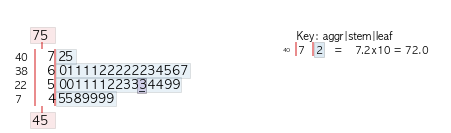

In [359]:
# 간단히 stemgraphic 패키지로 그리기 
import stemgraphic
s = (49, 62, 48, 49, 52, 61, 50, 50, 53, 61, 51, 51, 49, 64, 54, 52, 62, 60, 45, 
62, 49, 53, 51, 45, 61, 62, 63, 53, 61, 59, 62, 51, 65, 54, 67, 66, 59, 72, 75, 62)

# 패키지로 불렀을 땐, 줄기부분이 내림차순이다. 
plt.figure(figsize = (15,4))
fig, ax = stemgraphic.stem_graphic(s, scale = 10)

## 자료의 특성을 나타내는 수리적 척도

* 중심(central tendency)  
    - 평균(계산적 대표값), 중위수(위치적 대표값), 최빈수(mode, 빈도)
    
* 자료의 위치점 
    - 백분위수(Percentile), 사분위수(quartiles), 십분위수(deciles)
    
* 산포도 : 퍼짐의 정도(amount of variability) 
    - 범위(range) 
    - 사분위수범위(Interquartile Range, IQR)
    - 분산과 표준편차
    - 변이(동)계수(coefficient of variation, CV, Vc)
    - 표준점수(standard scores, z-score)
    

### [교재3장 연습문제, p.55] [3] 다음의 도수분포표는 대기업 간부의 25인의 연봉(백만원)을 나타낸 것이다. 

In [7]:
pd.DataFrame(np.array([["연봉", 55, 60, 70, 80, 300],['도수', 7, 5, 6, 4, 3]]))

,0,1,2,3,4,5
0,연봉,55,60,70,80,300
1,도수,7,5,6,4,3


이 표로부터 다음의 통계값들을 구하시오. 
    * 1) 중위수 2) 평균 3) 범위의 중앙 4) 왜도(안해도 됩니다) 
    * 5) IQR 6) 60%백분위수(또는 D ) 7) 표준편차 6 

In [91]:
# 위 표를 롱타입 데이터 프레임으로 변경

df_salary = pd.DataFrame(data = {"연봉" : [55, 60, 70, 80, 300], "도수" : [7, 5, 6, 4, 3]})
df_salary

,연봉,도수
0,55,7
1,60,5
2,70,6
3,80,4
4,300,3


In [250]:
# 위 도수분포표를 타이디데이터 롱타입으로 변경 
b = [55,55,55,55,55,55,55]
c = [60,60,60,60,60]
d = [70,70,70,70,70,70]
e = [80,80,80,80]
f = [300,300,300]
a = b+c+d+e+f

In [245]:
len(a)

25

In [252]:
df_salary_long = pd.DataFrame({"연봉" : a})
df_salary_long.head()

,연봉
0,55
1,55
2,55
3,55
4,55


In [254]:
# describe 를 통해 전체 연봉의 중요 정보를 알 수 있다. 하지만 하기 계산할 예정 

df_salary_long.describe()

,연봉
count,25.000000
mean,93.000000
std,78.514861
min,55.000000
25%,55.000000
50%,70.000000
75%,80.000000
max,300.000000


### 정답 

#### 정답 : 중위수

In [50]:
# 중위수 = (n+1)/2 번째 자료값 if n 이 홀수, ((n/2번째 값) + (n/2+1 번째 값))/2 if n 이 짝수 
# 전체 도수는 25 이므로 13번째 자료값이 중위수이다.표를 보고 13번째를 간단히 구할 수 있다. 
# 연봉 중위수인 13번째 자료값은 70 이다. 하기는 코드 
df_salary["연봉"].median()

70.0

#### 정답 : 평균

In [52]:
((df_salary["연봉"]*df_salary["도수"]).sum())/25

93.0

#### 정답 : 중앙범위 : 자료의 최대값과 최소관측값의 평균 

In [43]:
# 최대값 
df_salary_max = df_salary["연봉"].max()
df_salary_max

300

In [44]:
# 최소값
df_salary_min = df_salary["연봉"].min()
df_salary_min

55

In [46]:
# 중앙범위
(df_salary_max + df_salary_min)/2

177.5

#### 정답 : IQR (사분위수범위)

In [62]:
df_salary["누적도수"] = np.cumsum(df_salary["도수"]).to_list()
df_salary

,연봉,도수,누적도수
0,55,7,7
1,60,5,12
2,70,6,18
3,80,4,22
4,300,3,25


In [63]:
# 1사분위수 구하기 
q1 = 25*0.25
q1
# 6.25 번쨰 자료값은 55

6.25

In [255]:
# 3사분위수 구하기
q3 = 25*0.75
q3
# 18.75 번쨰 자료값은 80

18.75

In [256]:
# IQR 사분위수 범위 

IQR = 80 - 55
IQR

25

#### 정답 : 60% 백분위수

In [257]:
# n = 자료개수
# 백분위수의 위치 = (n+1)*P/100
(25+1)*60/100

# 15.6 번째 자료값이 60%백분위수이다

15.6

In [262]:
# 15.6 번째 자료값 찾기
print(df_salary_long.iloc[14]) #15번쨰 값
print(df_salary_long.iloc[15]) #16번쨰 값
# 따라서 15.6 번쨰 자료값은 70

연봉    70
Name: 14, dtype: int64
연봉    70
Name: 15, dtype: int64


#### 정답 : 표준편차

* 모분산 : 편차(자료값 - 평균) 제곱의 합에 자료값의 모집단 전체개수로 나눈다 
* 표본분산 : 편차(자료값 - 평균) 제곱의 합에 자료값의 표본 (전체개수-1)개 로 나눈다 
* 표준편차 : 모/표본분산에 루트 씌운다 

In [265]:
# 평균은 = 93
#표준편차 코드로 간단 확인
df_salary_long.std()

연봉    78.514861
dtype: float64

In [339]:
# 식으로 계산
# 루트 계산을 위해 match 패키지 불러오기
# 모분산을 통한 표준편차 구하기 
import math
편차 = (df_salary_long["연봉"]) - (df_salary_long["연봉"].mean())
모분산 = (편차*편차).sum()/25
표준편차 = math.sqrt(모분산)
표준편차

76.9285382676676

In [340]:
# 표준분산을 통한 표준편차 구하기 
# 파이썬 코드는 표준분산으로 표준편차 구하는 디폴트 

표준분산 = (편차*편차).sum()/24
표준편차 = math.sqrt(표준분산)
표준편차

78.51486058914791

## 평균, 표준편차, 박스플랏

### [교재3장 연습문제, p.59]

다음 표본자료는 세계 19대도시를 대상으로 월 전화 기본요금(단위:달러) 조사한 것이다.


7.28, 8.54, 15.28, 5.51, 3.17, 6.34, 3.80, 4.59, 5.12, 9.98, 7.04, 10.00, 11.96, 5.48, 2.30, 5.85, 9.39, 8.73, 7.66

1)평균 x를구하시오. 2)표준편차 s를계산하시오.
3) 미국 뉴욕의 월 전화 기본요금이 10(달러)일 때, 이 측정값의 Z점수를
구하시오. 4) 상자그림을 작성하시오.

### 정답

#### 정답 : 평균 x를구하시오

In [280]:
# 위 자료값을 리스트로 묶어 bill 이라는 변수에 할당
bill = [7.28, 8.54, 15.28, 5.51, 3.17, 6.34, 3.80, 4.59, 5.12, 9.98, 
7.04, 10.00, 11.96, 5.48, 2.30, 5.85, 9.39, 8.73, 7.66]

# 변수 자료수 확인 
len(bill)

19

In [338]:
# 리스트 bill 을 데이터프레임화 
df_bill = pd.DataFrame({"요금" : bill})
df_bill.head()

,요금
0,7.28
1,8.54
2,15.28
3,5.51
4,3.17


In [296]:
# 간단히 평균을 계산
df_bill.mean().round(3)

요금    7.264
dtype: float64

#### 정답 : 표준편차 s를계산하시오

In [310]:
# 표준편차 코딩 
df_bill.std()

요금    3.196667
dtype: float64

In [309]:
# 표준편자 계산식
편차 = (df_bill["요금"]) - (df_bill["요금"].mean())
표준분산 = (편차*편차).sum()/18
표준편차 = math.sqrt(표준분산)
표준편차

3.196667215483918

#### 정답 : 미국 뉴욕의 월 전화 기본요금이 10(달러)일 때, 이 측정값의 Z점수를 구하시오

In [319]:
df_bill = df_bill.sort_values(by = "요금").reset_index().drop("index", axis = 1)
df_bill[df_bill["요금"] == 10]

,요금
16,10.0


In [322]:
# z-score(표준점수) = (자료값 - 평균)/표준편차 
z_score_ny = (10 - df_bill["요금"].mean())/df_bill["요금"].std()
z_score_ny

0.8558255486941766

#### 정답 : 상자그림을 작성하시오.

Text(0.5, 1.0, '박스플랏 : 세계 19대도시 월 전화 기본요금')

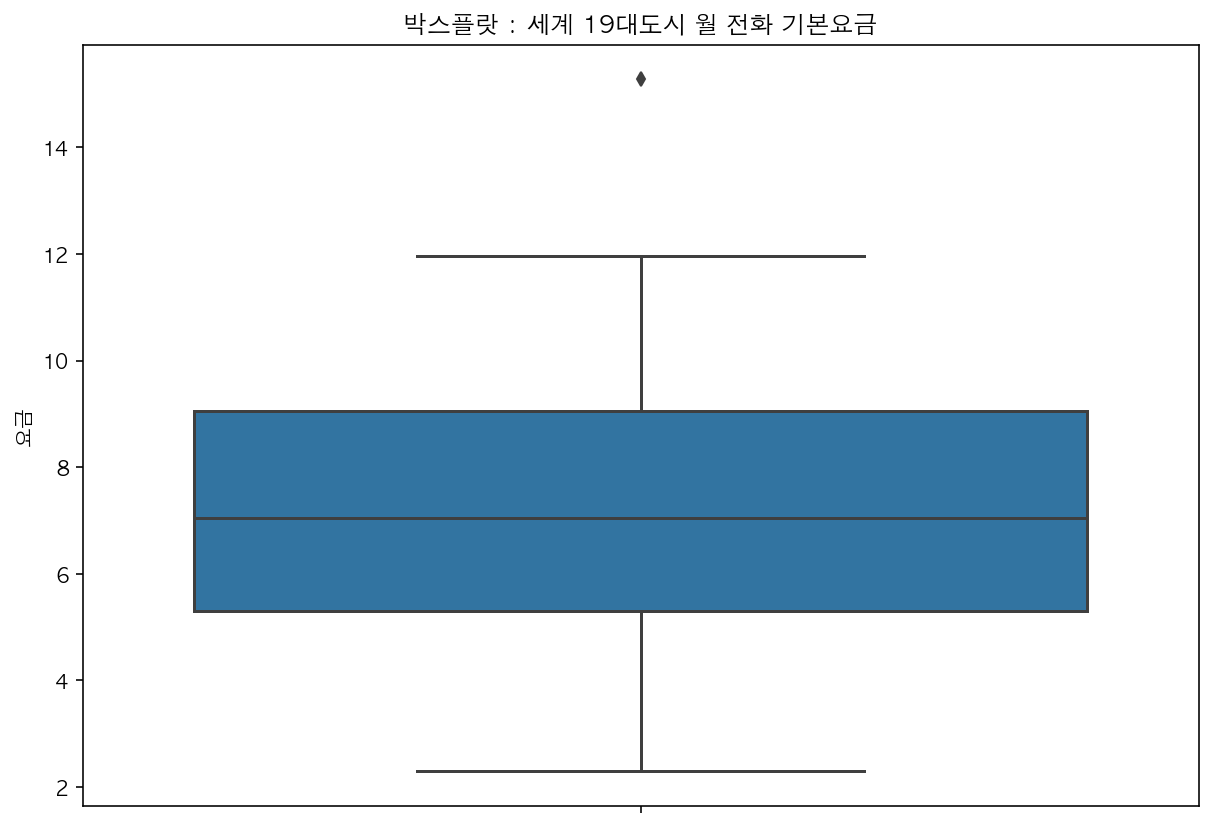

In [376]:
# 시각화 선명도 향상을 위한 matplotlib 레티나 모드 설정 코드
%matplotlib inline
%config InlineBackend.figure_format='retina'

# 그래프 사이즈 설정 
plt.figure(figsize = (10,7))
# 박스플랏 그리기
sns.boxplot(data = df_bill_nation, y = "요금").set_title("박스플랏 : 세계 19대도시 월 전화 기본요금")

In [341]:
# 데이터 중요 수리적지표와 박스플랏을 비교하며 마무리
df_bill.describe()

,요금
count,19.000000
mean,7.264211
std,3.196667
min,2.300000
25%,5.300000
50%,7.040000
75%,9.060000
max,15.280000


In [370]:
df_bill[df_bill["요금"] == 15.280000]

,요금
2,15.28


In [377]:
z = [10,26,51,75,86,121]

In [379]:
df_z = pd.DataFrame(z)

In [381]:
df_z[0].std()

40.854620301748

In [ ]:
import numpy as np

tall=[147.9, 163.5, 159.8, 155.1, 163.3, 158.7, 172.0, 161.2, 153.9, 161.6]

weight=[41.7, 60.2, 47.0, 53.2, 48.3, 55.2, 58.5, 49.0, 46.7, 52.5]

tall_av = np.mean(tall)

weight_av = np.mean(weight)

a=0

b=0

c=0

for i in range(len(tall)):

    a=tall[i]-tall_av

    b=weight[i]-weight_av

    c+=a*b

print((c)/len(tall))

In [ ]:
np.var(X, axis=0, ddof=1).mean()

In [ ]:
from scipy.stats import variation  
import numpy as np

In [ ]:
variation(arr, axis = 0)

In [384]:
stat = [100, 237, 268, 291, 319,  344, 471, 372, 380,405, 426,443,491,504,570,621]

In [386]:
df_stat = pd.DataFrame(stat)

In [392]:
df_stat = df_stat.sort_values(by = 0)

In [393]:
df_stat.describe()

,0
count,16.000000
mean,390.125000
std,131.560822
min,100.000000
25%,312.000000
50%,392.500000
75%,476.000000
max,621.000000


In [398]:
#1 평균

q1 = 100 + 237 + 268 + 291 + 319 +  344 + 471 + 372 + 380 + 405 + 426 + 443 + 491 +504 +570+621
q1/16

390.125

0    380
Name: 8, dtype: int64

In [408]:
# 중위수 자료값개수가 짝수이면  n/2 번째 자료값과 n/2-1 번째 자료값의 중간 자료값의 중간 값이 된다 
# len(df_stat) 는 전체 개수 16개
# 8번째 값 
df_stat.iloc[8]

0    405
Name: 9, dtype: int64

In [410]:
# 7번째 값
df_stat.iloc[7]

0    380
Name: 8, dtype: int64

In [411]:
# 중위수
(df_stat.iloc[7] + df_stat.iloc[8])/2

0    392.5
dtype: float64

In [400]:
16

,0
0,100
1,237
2,268
3,291
4,319
5,344
7,372
8,380
9,405
10,426


In [415]:
# 제10백분위수 와 제90백분위수
# 제10백분위수
# 16*0.1 의 정수의 + 1 번쨰 작은값 = 2번쨰 
df_stat.iloc[1]

0    237
Name: 1, dtype: int64

In [437]:
# 제90백분위수 와 제90백분위수
# 제90백분위수 16*0.9 = 14.4 이므로 15번쨰 값 


df_stat.iloc[14]


0    570
Name: 14, dtype: int64

In [439]:
# 3분위수 16*0.75 = 12 번째 값과 다음 값의 평균 
(df_stat.loc[11] + df_stat.loc[12])/2

0    467.0
dtype: float64

In [440]:
# 1분위수 16*0.25 = 4 번째 값과 다음으로 큰 자료값의 평균 
(df_stat.loc[3] + df_stat.loc[4])/2

0    305.0
dtype: float64

In [441]:
#사분위수 범위 =
467.0-305.0

162.0

In [447]:
(df_stat[0])

0     100
1     237
2     268
3     291
4     319
5     344
7     372
8     380
9     405
10    426
11    443
6     471
12    491
13    504
14    570
15    621
Name: 0, dtype: int64

In [453]:
0.5+0.4-0.02

0.88

In [454]:
5+4+3+2+1

15

In [455]:
(12*15)/36

5.0